In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [2]:
results = pd.read_csv('../../Data/ResultData/wave_trend_results.csv')

In [3]:
results.head()

,symbol,indicator,start_date,end_date,ob_level,os_level,k,mean,std,skewness,kurtosis,entropy,n_total_partitions,n_partitions,clean_gains
0,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.001,0.09428,0.002346,0.055612,-0.985233,9.217999,69,8,0.493738
1,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.002,0.09428,0.002346,0.055612,-0.985233,9.217999,65,8,-0.173816
2,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.003,0.09428,0.002346,0.055612,-0.985233,9.217999,61,9,-0.184818
3,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.004,0.09428,0.002346,0.055612,-0.985233,9.217999,56,9,0.334299
4,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,53,-53,0.005,0.09428,0.002346,0.055612,-0.985233,9.217999,53,7,1.629595


In [4]:
for index, row in results.iterrows():
    print(row['start_date'] + ' - ' + row['end_date'])

2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-09-12 00:01:00 - 2020-09-19 0

2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 00:00:00
2020-11-21 00:01:00 - 2020-11-28 0

2021-01-25 00:00:00 - 2021-01-31 23:59:00


array([[<AxesSubplot:title={'center':'clean_gains'}>]], dtype=object)

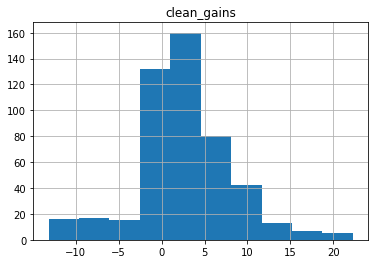

In [5]:
non_zero_results = results[results['clean_gains'] != 0]
non_zero_results.hist(column = 'clean_gains')

For each time frame:
* Build ML models (including hyperparameter tunning)
* Evaluate them
* Perform t-test and select model
* Store optimal values in dataset if the R^2 is greater than 0.8 and clean gains are positive

ML algorithms used:
* Linear Regression
* Ridge Regression
* Lasso Regression
* ElasticNet
* Stochastic Gradient Descent
* Decision Tree Regressor
* Linear Support Vector Regressor
* KNN Regressor
* Gradient Boosting regressor
> MLP Regressor excluded at the moment

# Generate train and test datasets

In [6]:
df = results[results['clean_gains'] != 0]

start_date = df.iloc[0]['start_date']
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = start_date + timedelta(days = 7)
df = df[(df['start_date'] >= str(start_date)) & (df['end_date'] < str(end_date))]

df = df.sample(frac=1)
df = df.reset_index(drop=True)

X = df['k'].to_numpy()
y = df['clean_gains'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Linear regression

In [7]:
linear_regr = LinearRegression()

linear_regr.fit(X_train, y_train)

linear_regr_y_predicted = linear_regr.predict(X_test)

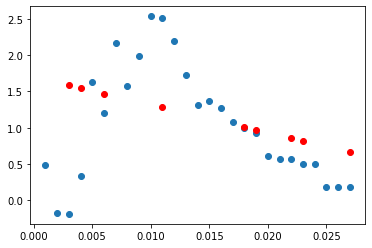

In [8]:
plt.scatter(X, y)
plt.scatter(X_test, linear_regr_y_predicted, color='r') 

In [9]:
linear_regr_R2 = metrics.r2_score(y_test, linear_regr_y_predicted)
print(linear_regr_R2)

-0.3618888876340858


# Ridge regression

In [10]:
ridge_regr = Ridge(alpha = 0.00001) # TODO: tunning

ridge_regr.fit(X_train, y_train)

ridge_regr_y_predicted = ridge_regr.predict(X_test)

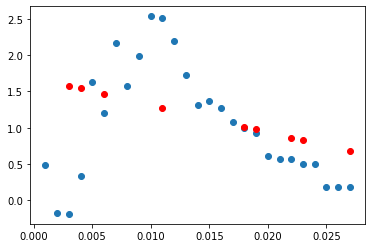

In [11]:
plt.scatter(X, y)
plt.scatter(X_test, ridge_regr_y_predicted, color='r')

In [12]:
ridge_regr_R2 = metrics.r2_score(y_test, ridge_regr_y_predicted)
print(ridge_regr_R2)

-0.3592578525125021


# Lasso regression

In [13]:
lasso_regr = Lasso(alpha = 0.00001) # TODO: tunning

lasso_regr.fit(X_train, y_train)

lasso_regr_y_predicted = lasso_regr.predict(X_test)

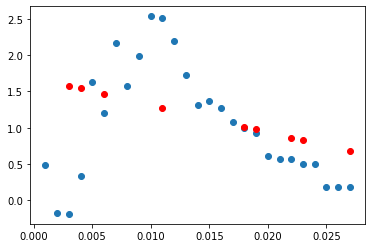

In [14]:
plt.scatter(X, y)
plt.scatter(X_test, lasso_regr_y_predicted, color='r')

In [15]:
lasso_regr_R2 = metrics.r2_score(y_test, lasso_regr_y_predicted)
print(lasso_regr_R2)

-0.36062326381825605


# ElasticNet

In [16]:
elastic_net = ElasticNet(alpha=0.00001, l1_ratio=0.1)

elastic_net.fit(X_train, y_train)

elastic_net_y_predicted = elastic_net.predict(X_test)

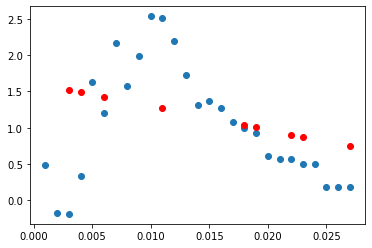

In [17]:
plt.scatter(X, y)
plt.scatter(X_test, elastic_net_y_predicted, color='r')

In [18]:
elastic_net_R2 = metrics.r2_score(y_test, elastic_net_y_predicted)
print(elastic_net_R2)

-0.32841463785309233


# Stochastic Gradient Descent

In [19]:
sgd_regr = SGDRegressor(max_iter=1000, tol=1e-3)

sgd_regr.fit(X_train, y_train)

sgd_regr_y_predicted = sgd_regr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


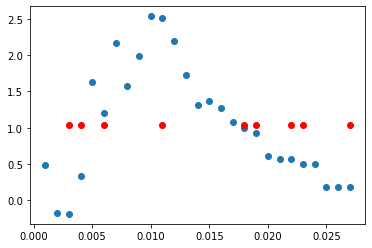

In [20]:
plt.scatter(X, y)
plt.scatter(X_test, sgd_regr_y_predicted, color='r')

In [21]:
sgd_regr_R2 = metrics.r2_score(y_test, sgd_regr_y_predicted)
print(sgd_regr_R2)

-0.12032536251436365


# DecisionTreeRegressor

In [22]:
dt = DecisionTreeRegressor(random_state=0)

dt.fit(X_train, y_train)

dt_y_predicted = dt.predict(X_test)

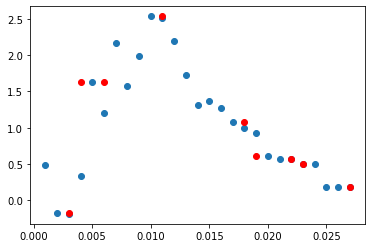

In [23]:
plt.scatter(X, y)
plt.scatter(X_test, dt_y_predicted, color='r')

In [24]:
dt_R2 = metrics.r2_score(y_test, dt_y_predicted)
print(dt_R2)

0.5954873677305519


# Linear Support Vector Regressor

In [25]:
svr = LinearSVR(random_state=0, tol=1e-5)

svr.fit(X_train, y_train)

svr_y_predicted = svr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


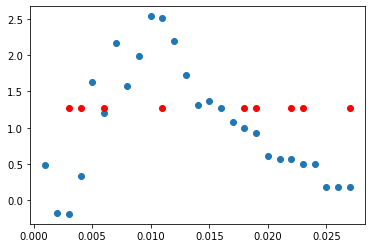

In [26]:
plt.scatter(X, y)
plt.scatter(X_test, svr_y_predicted, color='r')

In [27]:
svr_R2 = metrics.r2_score(y_test, svr_y_predicted)
print(svr_R2)

-0.45319375723934274


# KNN Regressor

In [28]:
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train, y_train)

knn_y_predicted = knn.predict(X_test)

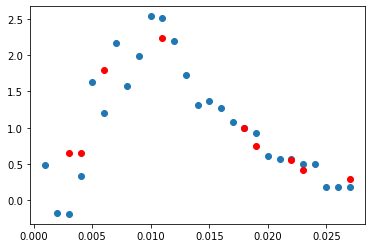

In [29]:
plt.scatter(X, y)
plt.scatter(X_test, knn_y_predicted, color = 'r')

In [30]:
knn_R2 = metrics.r2_score(y_test, knn_y_predicted)
print(knn_R2)

0.7390431153605108


# Gradient Boosting Regressor

In [31]:
gbr = GradientBoostingRegressor(random_state=0)

gbr.fit(X_train, y_train)

gbr_y_predicted = gbr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


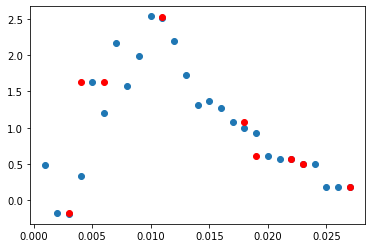

In [32]:
plt.scatter(X, y)
plt.scatter(X_test, gbr_y_predicted, color = 'r')

In [33]:
gbr_R2 = metrics.r2_score(y_test, gbr_y_predicted)
print(gbr_R2)

0.5952684473251315
